## Part 1: Connecting to CityBikes API
1 . Send a request to CityBikes for the city of your choice.

In [18]:
import requests
import pandas as pd
import numpy as np
import pprint

In [19]:
# Request CityBikes API
citybikes  = requests.get('http://api.citybik.es/v2/networks').json()

# Fetch data from the CityBikes API and used the pprint module to pretty-print the citybikes JSON response
pprint.pprint(citybikes)

{'networks': [{'company': ['ЗАО «СитиБайк»'],
               'href': '/v2/networks/velobike-moscow',
               'id': 'velobike-moscow',
               'location': {'city': 'Moscow',
                            'country': 'RU',
                            'latitude': 55.75,
                            'longitude': 37.616667},
               'name': 'Velobike'},
              {'company': ['Urban Infrastructure Partner'],
               'href': '/v2/networks/baerum-bysykkel',
               'id': 'baerum-bysykkel',
               'location': {'city': 'Bærum',
                            'country': 'NO',
                            'latitude': 59.89455,
                            'longitude': 10.546343},
               'name': 'Bysykkel'},
              {'company': ['Comunicare S.r.l.'],
               'href': '/v2/networks/bicincitta-siena',
               'id': 'bicincitta-siena',
               'location': {'city': 'Siena',
                            'country': 'IT',
            

In [20]:
# Creating a DataFrame for citybikes
df = pd.DataFrame(citybikes)

# Normalize df to visualize it more effectively
df = pd.json_normalize(citybikes['networks'])
df

,company,href,id,name,location.city,location.country,location.latitude,location.longitude,source,gbfs_href,license.name,license.url,ebikes
0,[ЗАО «СитиБайк»],/v2/networks/velobike-moscow,velobike-moscow,Velobike,Moscow,RU,55.750000,37.616667,NaN,NaN,NaN,NaN,NaN
1,[Urban Infrastructure Partner],/v2/networks/baerum-bysykkel,baerum-bysykkel,Bysykkel,Bærum,NO,59.894550,10.546343,NaN,NaN,NaN,NaN,NaN
2,[Comunicare S.r.l.],/v2/networks/bicincitta-siena,bicincitta-siena,Bicincittà,Siena,IT,43.318600,11.330600,https://www.bicincitta.com/frmLeStazioni.aspx?...,NaN,NaN,NaN,NaN
3,[Cyclopolis Systems],/v2/networks/cyclopolis-maroussi,cyclopolis-maroussi,Cyclopolis,Maroussi,GR,38.056872,23.808330,NaN,NaN,NaN,NaN,NaN
4,[Cyclopolis Systems],/v2/networks/cyclopolis-nafplio,cyclopolis-nafplio,Cyclopolis,Nafplio,GR,37.563940,22.809340,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,[Instituto Tecnológico de Castilla y León (ITCL)],/v2/networks/albabici,albabici,AlbaBici,Albacete,ES,38.994300,-1.860200,NaN,NaN,NaN,NaN,NaN
586,[Instituto Tecnológico de Castilla y León (ITCL)],/v2/networks/bicialcazar,bicialcazar,BiciAlcázar,Alcázar de San Juan,ES,39.390100,-3.210100,NaN,NaN,NaN,NaN,NaN
587,[Instituto Tecnológico de Castilla y León (ITCL)],/v2/networks/tallinja-bike,tallinja-bike,Tallinja Bike,Valletta - Malta - Gozo,MT,35.899200,14.514100,NaN,NaN,NaN,NaN,NaN
588,"[PBSC Urban Solutions, Shift Transit]",/v2/networks/tugo-bike-share,tugo-bike-share,Tugo Bike Share,"Tucson, AZ",US,32.222500,-110.974900,NaN,https://tucson.publicbikesystem.net/customer/g...,NaN,NaN,NaN


In [21]:
# Check duplicate id
uniqueid = df['id'].nunique()
duplicate_id = len(df) - uniqueid

print(f"Duplicate Ids = {duplicate_id}")

Duplicate Ids = 0


In [22]:
# Check is there any different country have same city
city_country_groups = df.groupby('location.city')['location.country'].unique()
cities_with_multiple_countries = city_country_groups[city_country_groups.apply(len) > 1]

print(f"Cities with multiple countries:{cities_with_multiple_countries}")

Cities with multiple countries:Series([], Name: location.country, dtype: object)


2. Parse through the response to get the details you want for the bike stations in that city (latitude, longitude, number of bikes).

In [23]:
# Find cities in Canada from city_bikes
cities_canada = []

for index, row in df.iterrows():
    if row['location.country'] == 'CA':
        cities_canada.append((row['location.city'], row['location.country']))
        
print(cities_canada)


[('Montréal, QC', 'CA'), ('Toronto, ON', 'CA'), ('Hamilton, ON', 'CA'), ('Vancouver', 'CA'), ('Québec', 'CA'), ('Saguenay', 'CA')]


In [24]:
# I pick up Vancouver city in Canada
# Find the network id & name  in Vancouver
network =[]

for index, row in df.iterrows():
    if row['location.city'] == 'Vancouver':
        network.append((row['id'], row['name']))

print(network)

[('mobibikes', 'Mobi')]


In [25]:
# Check result above
vancouver_data = df[df['location.city'] == 'Vancouver']
vancouver_data

,company,href,id,name,location.city,location.country,location.latitude,location.longitude,source,gbfs_href,license.name,license.url,ebikes
210,"[Vanncouver Bike Share Inc., CycleHop LLC, Cit...",/v2/networks/mobibikes,mobibikes,Mobi,Vancouver,CA,49.2827,-123.1207,NaN,https://vancouver-gbfs.smoove.pro/gbfs/2/gbfs....,NaN,NaN,NaN


In [26]:
# Request stations API from network_id is "mobibikes"
station  = requests.get('http://api.citybik.es/v2/networks/mobibikes').json()

# Extracting name, latitude, longitude, and number of bikes for each station
for i in station['network']['stations']:
    
    name = i['name']
    latitude = i['latitude']
    longitude = i['longitude']
    free_bikes = i['free_bikes']
    
    print(f"{name},  latitude:{latitude},  longitude:{longitude},  number of free bikes: {free_bikes}")

10th & Cambie,  latitude:49.262487,  longitude:-123.114397,  number of free bikes: 12
Yaletown-Roundhouse Station,  latitude:49.274566,  longitude:-123.121817,  number of free bikes: 11
Dunsmuir & Beatty,  latitude:49.279764,  longitude:-123.110154,  number of free bikes: 16
12th & Yukon (City Hall),  latitude:49.260599,  longitude:-123.113504,  number of free bikes: 4
8th & Ash,  latitude:49.264215,  longitude:-123.117772,  number of free bikes: 2
Spyglass & Seawall,  latitude:49.270877,  longitude:-123.115103,  number of free bikes: 2
Stamps Landing,  latitude:49.26893,  longitude:-123.11813,  number of free bikes: 7
Ontario & Seawall,  latitude:49.271721,  longitude:-123.104207,  number of free bikes: 13
Canada Place,  latitude:49.287214,  longitude:-123.11287,  number of free bikes: 9
Granville & Georgia,  latitude:49.282409,  longitude:-123.118541,  number of free bikes: 3
Pender & Burrard,  latitude:49.287097,  longitude:-123.118551,  number of free bikes: 4
Marinaside & Davie,  

4. Put your parsed results into a DataFrame.

Rearranging columns in a dataset for easier visualization

In [27]:
# Extracting list of stations
stations_list = station['network']['stations']

# Convert this list into a DataFrame
df_stations = pd.DataFrame(stations_list)

# Flatten nested columns
df_stations = pd.json_normalize(stations_list)

# Rearrange the columns
df_stations = df_stations[['name', 'id', 'empty_slots', 'free_bikes', 'latitude', 'longitude', 'timestamp', 'extra.ebikes', 'extra.has_ebikes', 'extra.last_updated', 'extra.normal_bikes', 'extra.renting', 'extra.returning', 'extra.slots', 'extra.uid']]
df_stations.head()

,name,id,empty_slots,free_bikes,latitude,longitude,timestamp,extra.ebikes,extra.has_ebikes,extra.last_updated,extra.normal_bikes,extra.renting,extra.returning,extra.slots,extra.uid
0,10th & Cambie,7a19c49f486d7c0c02b3685d7b240448,21,12,49.262487,-123.114397,2023-09-21T05:01:08.937000Z,0,True,1695272339,12,True,True,36,0001
1,Yaletown-Roundhouse Station,32603a87cfca71d0f7dfa3513bad69d5,5,11,49.274566,-123.121817,2023-09-21T05:01:08.934000Z,2,True,1695272061,9,True,True,16,0004
2,Dunsmuir & Beatty,6d42fa40360f9a6b2bf641c7b8bb2862,10,16,49.279764,-123.110154,2023-09-21T05:01:08.934000Z,0,True,1695272185,16,True,True,26,0005
3,12th & Yukon (City Hall),66f873d641d448bd1572ab086665a458,12,4,49.260599,-123.113504,2023-09-21T05:01:08.936000Z,4,True,1695272311,0,True,True,16,0007
4,8th & Ash,485d4d24c803cfde829ab89699fed833,14,2,49.264215,-123.117772,2023-09-21T05:01:08.941000Z,0,True,1695272244,2,True,True,16,0008


Exploratory Data Analysis (EDA)

In [28]:
# Identify the count of missing values in each column of a DataFrame.
df_stations.isnull().sum()

name                  0
id                    0
empty_slots           0
free_bikes            0
latitude              0
longitude             0
timestamp             0
extra.ebikes          0
extra.has_ebikes      0
extra.last_updated    0
extra.normal_bikes    0
extra.renting         0
extra.returning       0
extra.slots           0
extra.uid             0
dtype: int64

In [29]:
# Check uunique id
unit_id_station = df_stations['id'].nunique()
num_unit_id_station = len(df_stations) - unit_id_station
print( f" number dupplicate = {num_unit_id_station}")

 number dupplicate = 0


In [30]:
# Check type
df_stations.dtypes

name                   object
id                     object
empty_slots             int64
free_bikes              int64
latitude              float64
longitude             float64
timestamp              object
extra.ebikes            int64
extra.has_ebikes         bool
extra.last_updated      int64
extra.normal_bikes      int64
extra.renting            bool
extra.returning          bool
extra.slots             int64
extra.uid              object
dtype: object

In [31]:
# Change type of timestamp to datetime
df_stations['timestamp'] = pd.to_datetime(df_stations['timestamp'])
df_stations['timestamp'].dtypes


datetime64[ns, UTC]

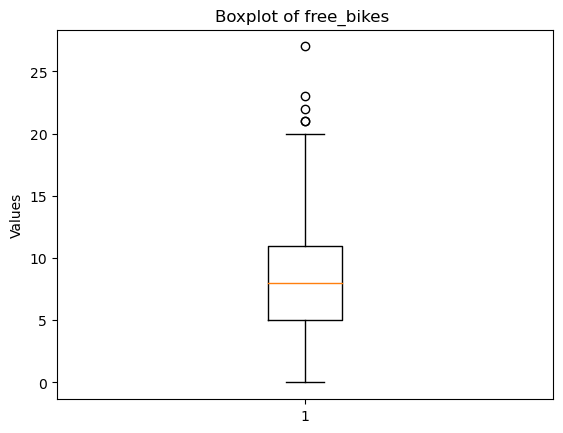

In [32]:
# Data Visualization for Outlier Detection 
# Column 'free_bikes' to find outlier - result: no outlier
# Creating the boxplot
import matplotlib.pyplot as plt
plt.boxplot(df_stations['free_bikes'])
plt.title('Boxplot of free_bikes ')
plt.ylabel('Values')
plt.show()


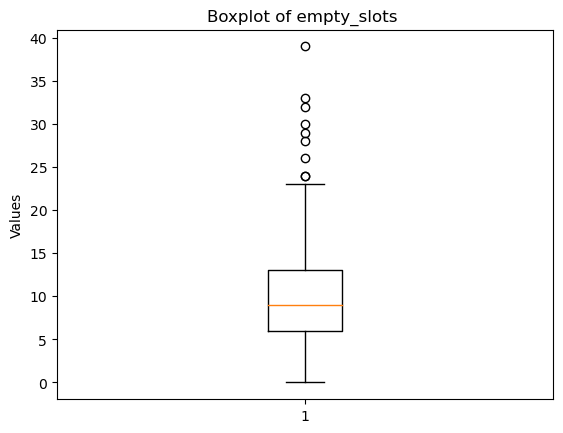

In [33]:
# Data Visualization for Outlier Detection 
# Column 'empty_slots' to find outlier - result: no outlier
# Creating the boxplot
plt.boxplot(df_stations['empty_slots'])
plt.title('Boxplot of empty_slots ')
plt.ylabel('Values')
plt.show()

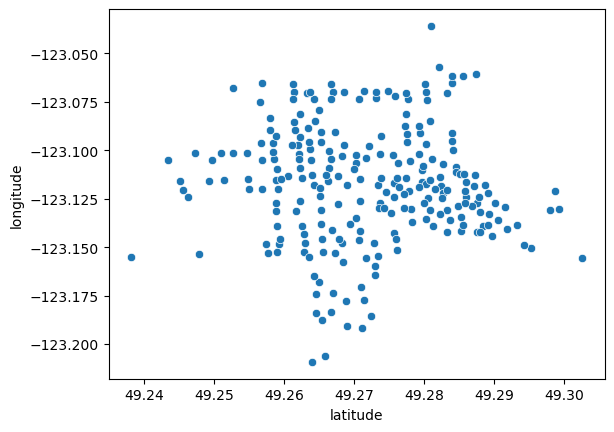

In [34]:
# Data Visualization for Outlier Detection 
# Column 'latitude' & 'longitude' to find outlier - result: no outlier
import seaborn as sns
sns.scatterplot(x="latitude", y="longitude", data=df_stations)
plt.show()

Save the DataFrame as a CSV file


In [38]:
import os

# Define the path
path ='C:\\Users\\CFS\\Desktop\\Data analysis\\Python\\Project_ Statistical-Modelling-with-Python\\Statistical-Modelling-with-Python\\notebooks'

# Creating the full file path
file_path = os.path.join(path, 'city_bikes.csv')

# Save the DataFrame
df_stations.to_csv(file_path, index=False)